In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
    "font.size": 24
})

<b> Server results: random </b>


x small

In [2]:
dfrand15 = pd.read_csv("../results/random/data_random15.csv", sep=",")
dfrand15['Circuit'] = r'Random XS'

small

In [3]:
dfrand50 = pd.read_csv("../results/random/data_random50.csv", sep=",")
dfrand50['Circuit'] = r'Random S'


medium

In [4]:
dfrand100 = pd.read_csv("../results/random/data_random100.csv", sep=",")
dfrand100['Circuit'] = r'Random M'

large

In [5]:
dfrand500 = pd.read_csv("../results/random/data_random500.csv", sep=",")
dfrand500['Circuit'] = r'Random L'

<b> Server results: quantum volume </b>

In [6]:
dfqv = pd.read_csv("../results/quantumvolume/data_qv.csv", sep=",")
dfqv['Circuit'] = 'Quantum Volume'

In [7]:
df_rand = pd.concat([dfrand15, dfrand50, dfrand100, dfrand500, dfqv])
df_rand['structure'] = 'r'

<b> Server results: multi-target </b>

In [8]:
dfmt = pd.read_csv("../results/multitarget/data_multitarget.csv", sep=",")
dfmt['Circuit'] = 'Multi-Target'

<b> Server results: QFT </b>

In [9]:
dfqft = pd.read_csv("../results/qft/data_qft.csv", sep=",")
dfqft['Circuit'] = 'QFT'

<b> Server results: DraperAdder </b>

In [10]:
dfdraper = pd.read_csv("../results/qftAdder/data_DraperAdder.csv", sep=",")
dfdraper['Circuit'] = 'DraperAdder'

<b> Server results: CuccarroAdder </b>

In [11]:
dfcuccarro = pd.read_csv("../results/cuccarroAdder/data_CuccarroAdder.csv", sep=",")
dfcuccarro['Circuit'] = 'CuccarroAdder'

In [12]:
df_structured = pd.concat([dfqft, dfdraper, dfmt, dfcuccarro])
df_structured['structure'] = 's'
df_total = pd.concat([df_rand, df_structured])

<b> Overview </b>

In [13]:
colorpalette=sns.color_palette("BrBG",15)[:5]+sns.color_palette("muted")

In [14]:
df_total['normalized'] = df_total['nmoves'] / df_total['cxcount']
df_total['density'] = df_total['cxcount'] / df_total['cxdepth']

In [15]:
df_plot_total = pd.melt(df_total, id_vars =['Circuit', 'structure'], value_vars =['cxcount', 'cxdepth','density'], value_name='count (1)')

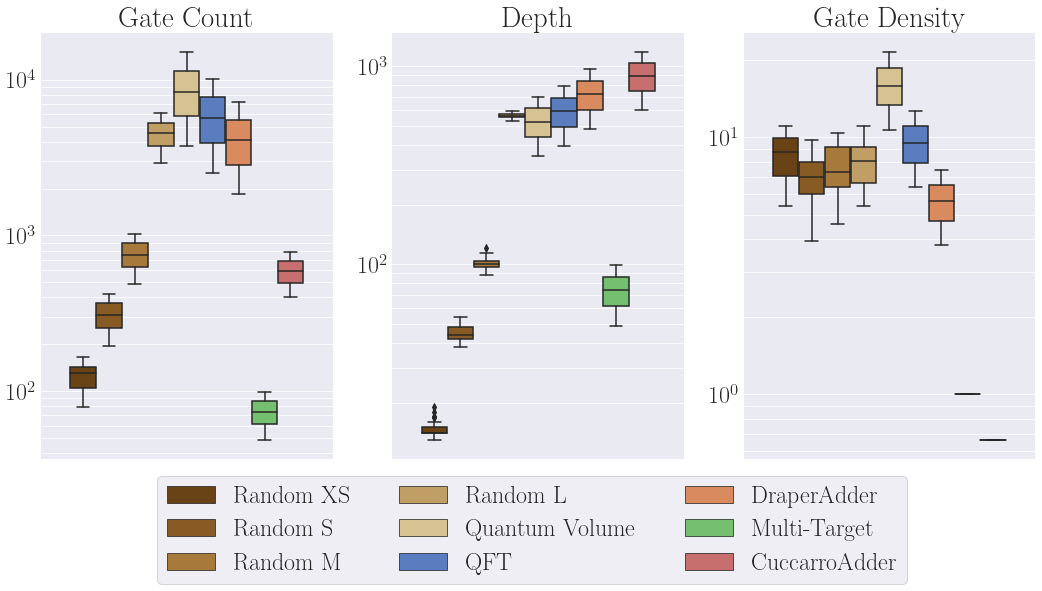

In [16]:
ax = sns.catplot(x='variable', y='count (1)', hue='Circuit', col='variable', data=df_plot_total, height=7, aspect=1,  kind='box', sharey=False, sharex=False, palette=colorpalette)

ax.errorbar=(lambda x: (x.min(), x.max()))
for i in range(3):
    ax.axes[0][i].grid(which='minor')
    ax.axes[0][i].set_yscale('log')
    ax.axes[0][i].set_xlabel('')
    ax.axes[0][i].set_xticklabels('')
    
ax.axes[0][0].set_title('Gate Count')
ax.axes[0][1].set_title('Depth')
ax.axes[0][2].set_title('Gate Density')
ax.axes[0][0].set_ylabel('')
plt.gcf().set_size_inches(15, 7)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.51, -0.22), ncol=3, title=None, frameon=True
)

plt.tight_layout()

In [17]:
df_plot_structured = pd.melt(df_total[df_total.structure=='s'], id_vars =['Circuit', 'structure'], value_vars =['cxcount', 'cxdepth','density'], value_name='count (1)')
df_plot_random = pd.melt(df_total[df_total.structure=='r'], id_vars =['Circuit', 'structure'], value_vars =['cxcount', 'cxdepth','density'], value_name='count (1)')

<b> Analysis </b>

### All-to-all

Success-rate

In [18]:
len(df_total[df_total.isvalid==True]) / len(df_total)

0.8697788697788698

Plot MOVES

<ipython-input-19-f5e5b146b41d>:3: UserWarning: The palette list has more values (15) than needed (9), which may not be intended.
  sns.scatterplot(data=df_plot, x='nqubits', y='nmoves', hue='Circuit', ax=ax, palette=colorpalette)


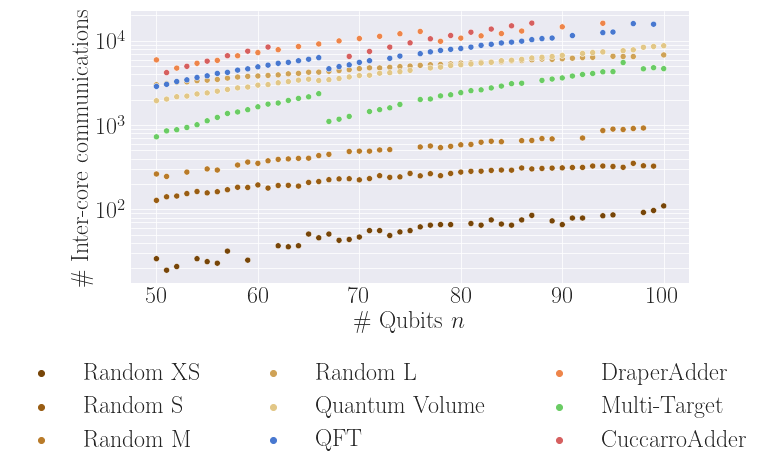

In [19]:
df_plot = df_total[df_total.isvalid==True]
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(data=df_plot, x='nqubits', y='nmoves', hue='Circuit', ax=ax, palette=colorpalette)
plt.ylabel(r"\# Inter-core communications")
plt.xlabel(r"\# Qubits $n$")
#plt.title(r"Number of qubit state transfers for different benchmarks")
plt.yscale('log')
plt.grid(which='minor')
plt.gcf().set_size_inches(10, 5)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.45, -0.7), ncol=3, title=None, frameon=False, 
)

Plot: NORMALIZED MOVES (MOVES / cx-count)

<ipython-input-20-59aaf7bae56b>:3: UserWarning: The palette list has more values (15) than needed (9), which may not be intended.
  sns.scatterplot(data=df_plot, x='nqubits', y='normalized', hue='Circuit', ax=ax, palette=colorpalette, legend=False)


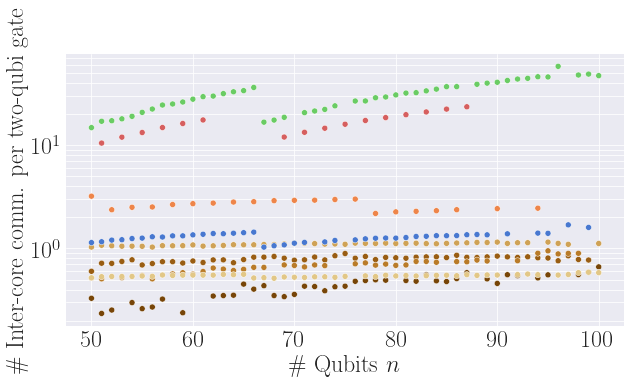

In [20]:
df_plot = df_total[df_total.isvalid==True]
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(data=df_plot, x='nqubits', y='normalized', hue='Circuit', ax=ax, palette=colorpalette, legend=False)
plt.ylabel(r"\# Inter-core comm. per two-qubi gate")
plt.xlabel(r"\# Qubits $n$")
#plt.title(r"Qubit state transfers per two-qubit gate for different benchmarks")
plt.yscale('log')
plt.grid(which='minor')
plt.gcf().set_size_inches(10, 5)

LAMBDA VALUES

<ipython-input-21-d9e3820abe28>:3: UserWarning: The palette list has more values (15) than needed (9), which may not be intended.
  sns.scatterplot(data=df_plot, x='nqubits', y='lam', hue='Circuit', ax=ax, palette=colorpalette, legend=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


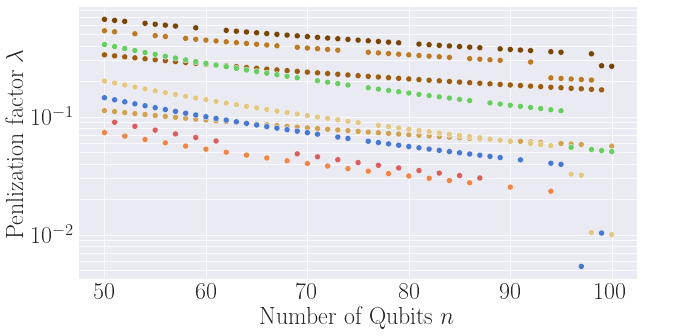

In [21]:
df_plot = df_total[df_total.isvalid==True]
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(data=df_plot, x='nqubits', y='lam', hue='Circuit', ax=ax, palette=colorpalette, legend=False)
plt.ylabel(r"Penlization factor $\lambda$")
plt.xlabel(r"Number of Qubits $n$")
#plt.title(r"Penlization of Movements")
plt.yscale('log')
plt.grid(which='minor')
plt.legend(bbox_to_anchor=(1, 0.75), loc=2)
plt.gcf().set_size_inches(10, 5)

Execution Time

<ipython-input-22-e6e1ffb8363e>:3: UserWarning: The palette list has more values (15) than needed (9), which may not be intended.
  sns.scatterplot(data=df_plot, x='nqubits', y='time', hue='Circuit', ax=ax, palette=colorpalette)


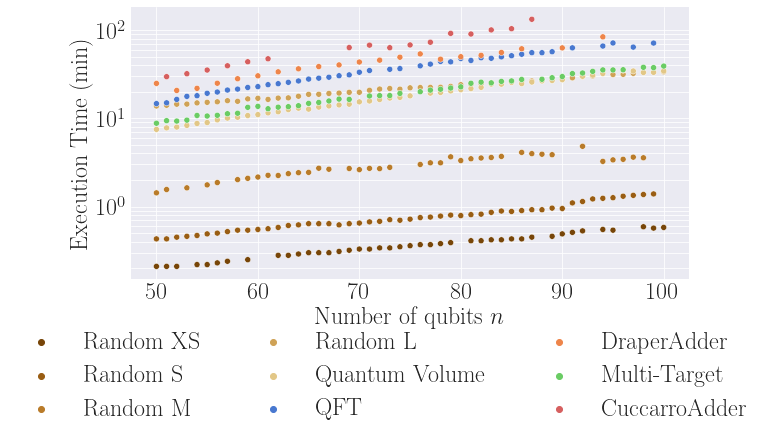

In [22]:
df_plot = df_total[df_total.isvalid==True]
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(data=df_plot, x='nqubits', y='time', hue='Circuit', ax=ax, palette=colorpalette)
plt.ylabel(r"Execution Time (min)")
plt.xlabel(r"Number of qubits $n$")
#plt.title(r"Number of qubit state transfers for different benchmarks")
plt.yscale('log')
plt.grid(which='minor')
plt.gcf().set_size_inches(10, 5)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.45, -0.6), ncol=3, title=None, frameon=False, 
)

### 2D Grid

In [23]:
dfgrid = pd.read_csv("../results/grid_data.csv", sep=",")